# Imports (do NOT change/add)

In [1]:
import operator

import csv
import statistics as stats
import math
import random

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load Wine Dataset
Loading/analyzing a subset of the [wine dataset](http://archive.ics.uci.edu/ml/datasets/Wine)
* Overlay histograms of the two features (alcohol, ascalinity)
* Output count of points, as well as mean & sample standard deviation of the features

In [2]:
alcohol = []
ascalinity = []

with open('wine_data.csv', "r") as csvfile:
    for row in csv.reader(csvfile):
        alcohol.append(float(row[0]))
        ascalinity.append(float(row[1]))
        
data = list(zip(alcohol, ascalinity))

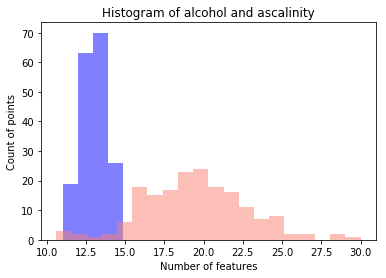

In [3]:
# 1. Overlay histograms of the two features (alcohol, ascalinity)
# 2. Output count of points, as well as mean & sample standard deviation of the features
# publications_per_author_lst = [len(author_publications[author]) for author in author_publications if author]
plt.xlabel('Number of features')
plt.ylabel('Count of points')
plt.title('Histogram of alcohol and ascalinity')
plt.hist([d[0] for d in data], bins=4, color='blue', alpha=0.5)
plt.hist([d[1] for d in data], bins=20, color='salmon', alpha=0.5)
plt.show()

# 2. Distance Metrics
* Implement the sse function and the general minkowski distance function

In [4]:
# returns the sum-squared-error between two points
def sse(x1, x2):
    return sum([(x-y)**2 for x, y in zip(x1, x2)])

In [5]:
# returns the minkowski distance between x1 and x2
def minkowski_distance(x1, x2, q):
    return (sum([abs(x-y)**q for x, y in zip(x1, x2)]))**(1/q)

In [6]:
# returns the L2 distance from x1 to x2
def euclidean_distance(x1, x2):
    return minkowski_distance(x1, x2, 2)

In [7]:
# returns the L1 distance from x1 to x2
def manhattan_distance(x1, x2):
    return minkowski_distance(x1, x2, 1)

In [8]:
t1 = [0,0]
t2 = [3,4]

print("SSE {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, sse(t1, t2), 25.))

print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, euclidean_distance(t1, t2), 5.))
print("Euclidean {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, euclidean_distance(t2, t1), 5.))

print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t1, t2, manhattan_distance(t1, t2), 7.))
print("Manhattan {} -> {} = {:.5f}, expected={:.5f}".format(t2, t1, manhattan_distance(t2, t1), 7.))

SSE [0, 0] -> [3, 4] = 25.00000, expected=25.00000
Euclidean [0, 0] -> [3, 4] = 5.00000, expected=5.00000
Euclidean [3, 4] -> [0, 0] = 5.00000, expected=5.00000
Manhattan [0, 0] -> [3, 4] = 7.00000, expected=7.00000
Manhattan [3, 4] -> [0, 0] = 7.00000, expected=7.00000


# 3. K-Means
* Implement choose_cluster (find the closest centroid w.r.t. a distance metric)
* Implement k-means
* Respond to a question regarding plotted clusterings

In [9]:
# Inputs: centroid locations, point, distance metric
# Outputs: centroid index that is closest
def choose_cluster(centroids, x, distance_metric):
    dist_index = {distance_metric(x, x2) : i for i, x2 in enumerate(centroids)}
    minValue = min([distance_metric(x, x2) for i, x2 in enumerate(centroids)])
    return dist_index[minValue]

In [10]:
def compute_averge_point(points):
    return (sum([x for x, y in points])/len(points), sum([y for x, y in points])/len(points))

In [11]:
def recompute_centroids(new_clusters, data):
    cluster_points = {}
    for centroid_index, point in zip(new_clusters, data):
        if centroid_index not in cluster_points:
            cluster_points[centroid_index] = [point]
        else:
            cluster_points[centroid_index].append(point)
    new_centroids = [compute_averge_point(points) for points in cluster_points.values()]
    return new_centroids

In [12]:
def is_converged(old_centroids, new_centroids):
    return all([x1[0] == x2[0] and x1[1] == x2[1] for x1, x2 in zip(old_centroids, new_centroids)])

In [13]:
# Inputs: 
#  initial_centroids: locations (length=K)
#  data: data points (length=N)
#  distance_metric: how to select the closest point in the e-step
# 
# Outputs:
#  centroids: locations (length=K)
#  new_clusters: for each data point, index of associated cluster
#  iterations: count of iterations taken
#  total_sse: SSE of final clustering
def kmeans(initial_centroids, data, distance_metric):
    centroids = initial_centroids[:]
    last_centroids = centroids
    new_clusters = [-1] * len(data)
    iterations = 0
    while not is_converged(last_centroids, centroids) or iterations == 0:
        iterations += 1
        new_clusters = [choose_cluster(centroids, x, distance_metric) for x in data]
        last_centroids = centroids
        centroids = recompute_centroids(new_clusters, data)
    total_sse = sum([sse(centroids[cluster_index], x2) for cluster_index, x2 in zip(new_clusters, data)])
#     print('total_sse: ', total_sse) # total_sse:  519.0803744318184
    return centroids, new_clusters, iterations, total_sse

In [14]:
def cluster_plot(centroids, data, clustering):
    for i,c in enumerate(centroids):
        points = [data[idx] for idx,c in enumerate(clustering) if c == i]
        plt.scatter([d[0] for d in points], [d[1] for d in points], label="{}".format(i))
        plt.plot(c[0], c[1], 'kx', mew=5, ms=10)

In [15]:
initial_centroids = [data[175], data[25], data[67]]

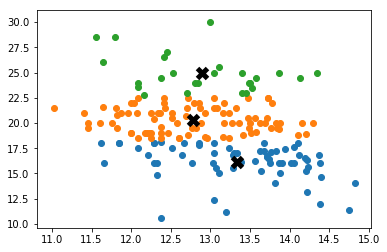

In [16]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, euclidean_distance)
cluster_plot(centroids, data, clustering)

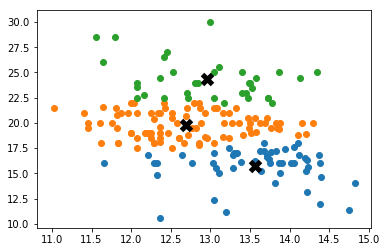

In [17]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, manhattan_distance)
cluster_plot(centroids, data, clustering)

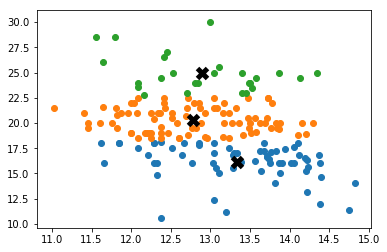

In [18]:
centroids, clustering, _, _ = kmeans(initial_centroids, data, lambda x,y: minkowski_distance(x, y, 3))
cluster_plot(centroids, data, clustering)

## Q: What conclusion can you draw from these plots?
TODO: Very similar result?

# 4. Choosing K
* Runs several trials of K-Means with different initial points (Forgy), recording SSE
* Plot SSE vs K
* Respond to the question below

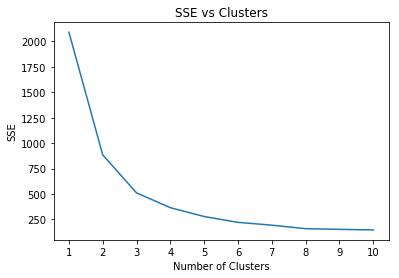

In [19]:
max_clusters = 10
trials = 5

clusters = []
sses = []

random.seed(8675309)

# 1. Perform 5 trials (randomizing initial points ala Forgy) for each of K=1, 2, ... 10
# 2. Plot SSE vs K
clusters = []
sses = []
for i in range(trials):
    for k in range(1, max_clusters+1):
        initial_centroids = [data[random.randint(0, 177)] for m in range(k)]
        _, _, _, squared_errors = kmeans(initial_centroids, data, euclidean_distance)
        if i == 0:
            clusters.append(k)
            sses.append(squared_errors)
        else:
            sses[k-1] += squared_errors
sses = [sse/trials for sse in sses]
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.plot(clusters, sses)
plt.xticks(range(1, len(clusters)+1, 1))
plt.title('SSE vs Clusters')

## Q: What is a reasonable value for K based upon this data -- why?
TODO: 8